Enter Filter 1:
    S&P 500 is above the 200 day moving average
Enter Filter 2:
    10 period RSI is below 30(buy on the next day's open)

Exit:
    10 period RSI is above 40, or after 10 trading days


In [157]:
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/evanfrench/Desktop/python_revisited/Stock_Price_Data/AAPL.csv')

In [158]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,11/11/16,26.780001,27.217501,26.637501,27.107500,25.591320,136575600
1,11/14/16,26.927500,26.952499,26.020000,26.427500,24.949354,204702000
2,11/15/16,26.642500,26.920000,26.540001,26.777500,25.279776,129058000
3,11/16/16,26.674999,27.557501,26.650000,27.497499,25.959503,235362000
4,11/17/16,27.452499,27.587500,27.207500,27.487499,25.950066,110528000


In [159]:
# Dropping the 200 days which our data is using to roll on in the beginning of our Data Frame
df['MA200'] = df['Adj Close'].rolling(window=200).mean()
df.dropna(inplace=True)

In [160]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA200
199,8/29/17,40.025002,40.779999,40.000000,40.727501,38.927891,118067600,32.756257
200,8/30/17,40.950001,40.972500,40.652500,40.837502,39.033031,109078400,32.823466
201,8/31/17,40.910000,41.130001,40.869999,41.000000,39.188347,107140400,32.894661
202,9/1/17,41.200001,41.235001,40.907501,41.012501,39.200302,66364400,32.964263
203,9/5/17,40.937500,41.062500,40.139999,40.520000,38.729561,117874000,33.028113


In [161]:
import matplotlib.pyplot as plt

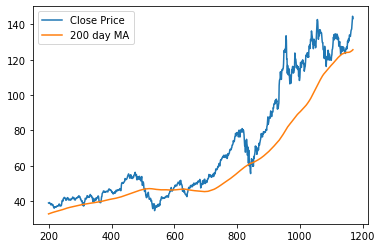

In [162]:
plt.plot(df['Adj Close'], label='Close Price')
plt.plot(df['MA200'],label='200 day MA');
plt.legend(loc='upper left')
plt.show()

In [163]:
df['price change'] = df['Adj Close'].pct_change()

In [164]:
df.dropna(inplace=True)

In [165]:
df['Upmove'] = df['price change'].apply(lambda x: x if x > 0 else 0)
df['down move'] = df['price change'].apply(lambda x: abs(x) if x < 0 else 0)

In [166]:
df['avg up'] = df['Upmove'].ewm(span=19).mean()
df['avg down'] = df['down move'].ewm(span=19).mean()
df = df.dropna()

In [167]:
df['RS'] = df['avg up'] / df['avg down']
df['RSI'] = df['RS'].apply(lambda x: 100 - (100/(x+1)))

In [168]:
df.loc[(df['Adj Close'] > df['MA200']) & (df['RSI'] < 30),'Buy'] = 'Yes'

In [169]:
df.loc[(df['Adj Close'] < df['MA200']) | (df['RSI'] > 30),'Buy'] = 'No'

In [170]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA200,price change,Upmove,down move,avg up,avg down,RS,RSI,Buy
200,8/30/17,40.950001,40.972500,40.652500,40.837502,39.033031,109078400,32.823466,0.002701,0.002701,0.000000,0.002701,0.000000,inf,100.000000,No
201,8/31/17,40.910000,41.130001,40.869999,41.000000,39.188347,107140400,32.894661,0.003979,0.003979,0.000000,0.003374,0.000000,inf,100.000000,No
202,9/1/17,41.200001,41.235001,40.907501,41.012501,39.200302,66364400,32.964263,0.000305,0.000305,0.000000,0.002241,0.000000,inf,100.000000,No
203,9/5/17,40.937500,41.062500,40.139999,40.520000,38.729561,117874000,33.028113,-0.012009,0.000000,0.012009,0.001590,0.003492,0.455221,31.281926,No
204,9/6/17,40.677502,40.747501,40.130001,40.477501,38.688931,86606800,33.091808,-0.001049,0.000000,0.001049,0.001201,0.002895,0.414944,29.325828,Yes


In [171]:
PnL = []

for i in range(len(df) - 12):
    if "Yes" in df['Buy'].iloc[i]:
        for j in range(1,11):
            if df['RSI'].iloc[i + j] > 40:
                PnL.append(df['Open'].iloc[i+j+1] - df['Open'].iloc[i+1])
                break
            elif j == 10:
                PnL.append(df['Open'].iloc[i+j+1] - df['Open'].iloc[i+1])

In [173]:
df.reset_index(drop=True,inplace=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA200,price change,Upmove,down move,avg up,avg down,RS,RSI,Buy
0,8/30/17,40.950001,40.972500,40.652500,40.837502,39.033031,109078400,32.823466,0.002701,0.002701,0.000000,0.002701,0.000000,inf,100.000000,No
1,8/31/17,40.910000,41.130001,40.869999,41.000000,39.188347,107140400,32.894661,0.003979,0.003979,0.000000,0.003374,0.000000,inf,100.000000,No
2,9/1/17,41.200001,41.235001,40.907501,41.012501,39.200302,66364400,32.964263,0.000305,0.000305,0.000000,0.002241,0.000000,inf,100.000000,No
3,9/5/17,40.937500,41.062500,40.139999,40.520000,38.729561,117874000,33.028113,-0.012009,0.000000,0.012009,0.001590,0.003492,0.455221,31.281926,No
4,9/6/17,40.677502,40.747501,40.130001,40.477501,38.688931,86606800,33.091808,-0.001049,0.000000,0.001049,0.001201,0.002895,0.414944,29.325828,Yes


In [174]:
def buy_sell(data):
    
    buy_list = []
    sell_list = []
    
    
    flag = 0

    for day in range(len(df)):
        # stock is above 200 day MA 
        if df['Adj Close'][day] > df['MA200'][day]:
            # RSI is below 30 and we have no position - Need to buy
            if flag == 0 and df['RSI'][day] < 40:
                
                # Buy a position
                buy_list.append(df['Adj Close'][day])
                sell_list.append(np.nan)
                flag = 1

            # RSI is above 30 and we have a position - Need to sell
            
            elif flag == 1 and df['RSI'][day] > 50:
                buy_list.append(np.nan)
                sell_list.append(df['Adj Close'][day])
                flag = 0
                
            else:
                buy_list.append(np.nan)
                sell_list.append(np.nan)

        # stock is below 200 day MA
        
        else:
            if flag == 1:
                buy_list.append(np.nan)
                sell_list.append(df['Adj Close'][day])
                flag = 0
            elif flag == 0:
                buy_list.append(np.nan)
                sell_list.append(np.nan)
        
    return (buy_list,sell_list)

buy_sell = buy_sell(df)

In [175]:
df['Buy Signal Price'] = buy_sell[0]
df['Sell Signal Price'] = buy_sell[1]

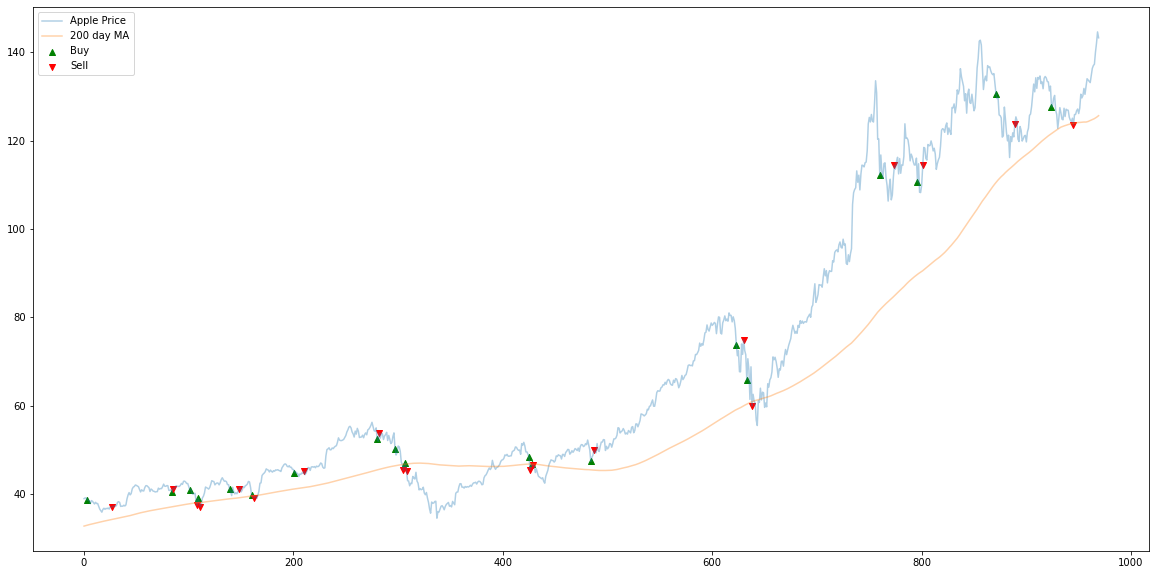

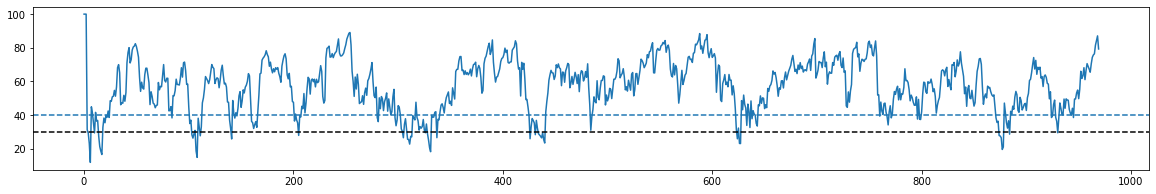

In [176]:
plt.figure(figsize=(20,10))

plt.plot(df['Adj Close'],label='Apple Price',alpha=.35)
plt.plot(df['MA200'],label='200 day MA',alpha=.35)
plt.legend(loc='upper left')

plt.scatter(x=df.index,y=df['Buy Signal Price'],label='Buy',marker='^',c='g')
plt.scatter(x=df.index,y=df['Sell Signal Price'],label='Sell',marker='v',c='r')

plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(20,3))

plt.plot(df['RSI']);

#plt.axhline(y=10,ls='--',label='10')
plt.axhline(y=30,ls='--',label='30',c='black')
plt.axhline(y=40,ls='--',label='40')
#plt.axhline(y=70,ls='--',label='70')
#plt.axhline(y=90,ls='--',label='90')
plt.show();

In [177]:
def average(data):
    average = sum(data) / len(data)
    return average

def win_rate(data):
    corret_prediction = []
    incorrect_prediction = []
    for prediction in data:
        if prediction > 0.0:
            corret_prediction.append(prediction)
        elif prediction < 0.0:
            incorrect_prediction.append(prediction)
        else:
            pass
    percentage = len(corret_prediction) / len(PnL)
    return percentage

win = str(round(win_rate(PnL),2) * 100)
  
print('The average change of our PnL list is: ' + str(round(average(PnL),2)) + '%')

print('Our win percentage is equal to: ' + win + '%')

The average change of our PnL list is: 2.12%
Our win percentage is equal to: 83.0%
